In [1]:
#first will import all the baisc libraries for manipulation,data visualization and statistics
import numpy as np
import pandas as pd
import scipy
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#will load the Abalone dataset
df=pd.read_csv('Abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Since,Rings+1.5 gives us Age in the years as discussed in the project so will add Age column and drop Rings column

In [3]:
#adding Age column in the dataframe
df['Age']=df['Rings']+1.5
df['Age']

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

In [4]:
#we have drop Rings Column from the dataframe and added Age
df.drop('Rings',axis=1,inplace=True)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


# EDA Process

In [59]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [60]:
#will check the shape of model
print(df.shape)
print(df.shape[0])
print(df.shape[1])

(4177, 9)
4177
9


In this dataset there are total 4177 rows and 9 columns present

In [61]:
#can check dimension of dataframe too
df.ndim

2

This shows that dataframe is of two dimensional

In [62]:
#we can check top 5 data from the dataset
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


This is showing top 5 rows of the dataset

In [63]:
#this shows top 3 rows
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,10.5


In [64]:
#we can also find-out bottom 5
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,13.5


This is showing bottom 5 rows of the dataset

In [65]:
#this shows bottom 7 rows of the dataset
df.tail(7)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
4170,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,11.5
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,9.5
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,13.5


In [66]:
#this gives us any one random row of the dataset
df.sample()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
1814,M,0.655,0.545,0.19,1.4245,0.6325,0.333,0.378,11.5


This shows us any one random row of the dataset

In [67]:
#will check data types of each attributes
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Age               float64
dtype: object

This shows that Target variable(Age) is of float type,hence will apply regression model to it

In [68]:
df.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

This shows that above attribute is having 3 category which is Male,Female and Infant

In [69]:
#we can count the categorical values
df.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

Since the 'Sex' column has categorical values as Male,Female and infant so we can count the number of each.
In this dataset there are total 1528 Males,1342 Infant and 1307 Females out of 4177 datas.

<AxesSubplot:xlabel='Sex', ylabel='count'>

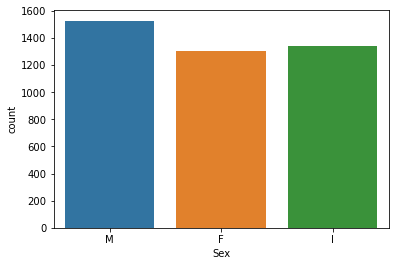

In [70]:
#distribution of the category
sns.countplot(df.Sex)

we can also use countplot graph to check the distribution of Male,Female and infant

#### Using Label Encoder

In [54]:
#since 'Sex' column is in categorical form then will change it into numeric form
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


As we can see that the 'Sex' attribute is successfully transformed into the numeric form

#### Checking Null Value

In [72]:
#checking null values in boolean form
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [73]:
#this shows that there is no null value present 
df.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Age               False
dtype: bool

In [74]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

As we can see that there is no null/nan value present into it hence will go ahead and check other EDA process

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), int32(1)
memory usage: 277.5 KB


This gives us brief information about all the attributes like data types,null values,total values present in each attributes and storage information too

#### Data Visulaization

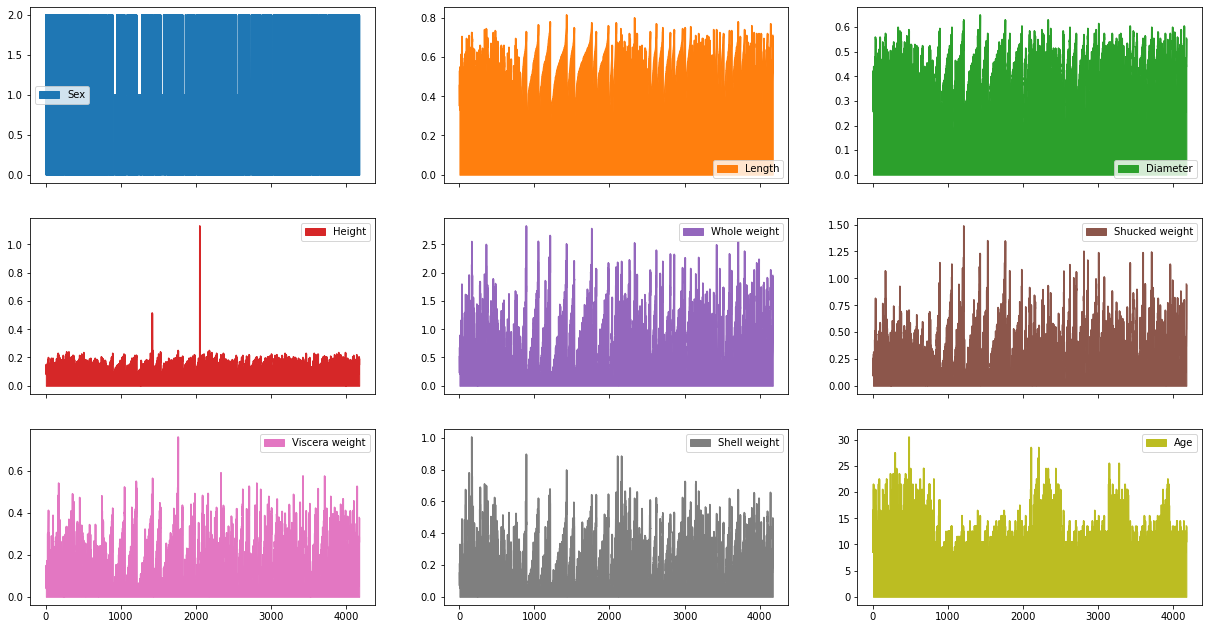

In [193]:
df.plot(kind='area',subplots=True,layout=(3,3),figsize=(21,11))
plt.show()

This shows that height column has covered less area as compare to other attributes which indiactes probability of outliers are high

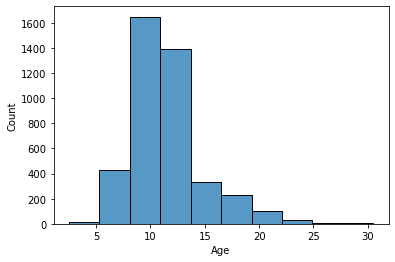

In [86]:
sns.histplot(df.Age,bins=10)
plt.show()

In the above histogram we can see that there are 1600 data present b/w age range 8-11 yrs

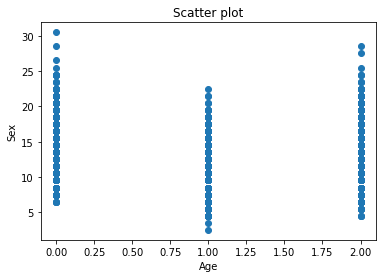

In [6]:
plt.scatter(df.Sex,df.Age)
plt.ylabel('Sex')
plt.xlabel('Age')
plt.title('Scatter plot')
plt.show()

This scatter plot shows that b/w 5-25 the data are equally distributed,i.e. b/w 5-25 yrs of Age the distribution is more.

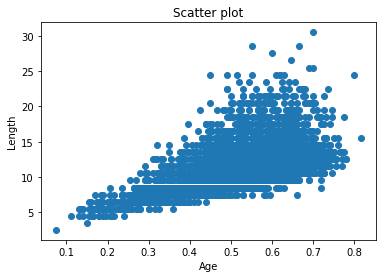

In [7]:
plt.scatter(df.Length,df.Age)
plt.ylabel('Length')
plt.xlabel('Age')
plt.title('Scatter plot')
plt.show()

We can say there are strong,positive and linear relationship b/w both the variables 

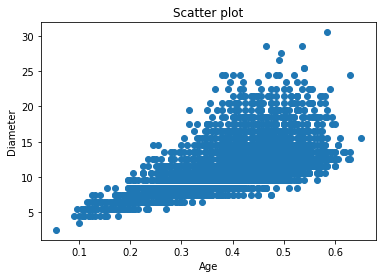

In [8]:
plt.scatter(df.Diameter,df.Age)
plt.ylabel('Diameter')
plt.xlabel('Age')
plt.title('Scatter plot')
plt.show()

We can say there are strong,positive and linear relationship b/w both the variables

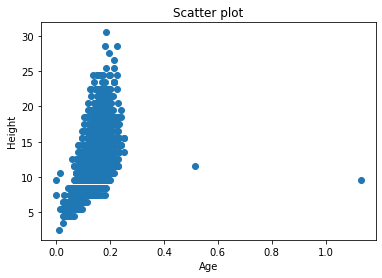

In [9]:
plt.scatter(df.Height,df.Age)
plt.ylabel('Height')
plt.xlabel('Age')
plt.title('Scatter plot')
plt.show()

We can say that outliers are present on lower right side and all the data are distributed b/w height 0.0-0.3,i.e. all the Age group data are spread b/w height 0.0-0.3,which shows that skewness are present.

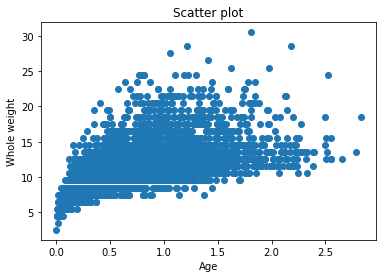

In [10]:
plt.scatter(df['Whole weight'],df.Age)
plt.ylabel('Whole weight')
plt.xlabel('Age')
plt.title('Scatter plot')
plt.show()

We can say that b/w 10-15 the distribution of data sets is more and clusters are present

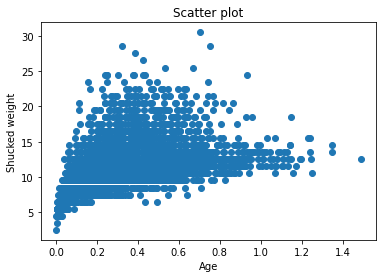

In [11]:
plt.scatter(df['Shucked weight'],df.Age)
plt.ylabel('Shucked weight')
plt.xlabel('Age')
plt.title('Scatter plot')
plt.show()

We can say that b/w 9-13 the distribution of data sets is more and clusters are present

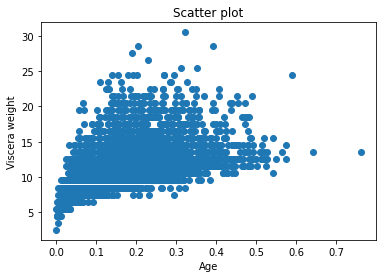

In [12]:
plt.scatter(df['Viscera weight'],df.Age)
plt.ylabel('Viscera weight')
plt.xlabel('Age')
plt.title('Scatter plot')
plt.show()

We can say that b/w 10-15 the distribution of data sets is more and clusters are present

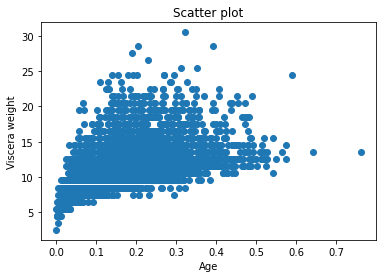

In [13]:
plt.scatter(df['Viscera weight'],df.Age)
plt.ylabel('Viscera weight')
plt.xlabel('Age')
plt.title('Scatter plot')
plt.show()

We can say that b/w 9-14 the distribution of data sets is more and clusters are present

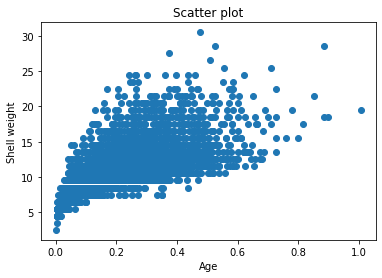

In [14]:
plt.scatter(df['Shell weight'],df.Age)
plt.ylabel('Shell weight')
plt.xlabel('Age')
plt.title('Scatter plot')
plt.show()

We can say that b/w 10-14 the distribution of data sets is more and clusters are present

#### Descriptive Statistics

In [96]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


We can conclude that median is greater than mean for Length,Diameter columns so there can be possibillity that outliers are present & skewed left hand side.Also standard deviation is approx 1 and mean is approx zero for most of the columns except Age and Sex.

In [32]:
#Count- Total no of values present in each attributes
#Mean- It's the average of each attributes
#std-Standard deviation is the deviation from the mean
#min- is the lowest data point of the attributes
#25 percentile- is the 1st interquartile(IQR) which indicate data below which 25 percent of population is there.
#50 percentile- is the median or 2nd IQR
#75 percentile- is the 3rd IQR
#Max- is the highest data point of the attributes

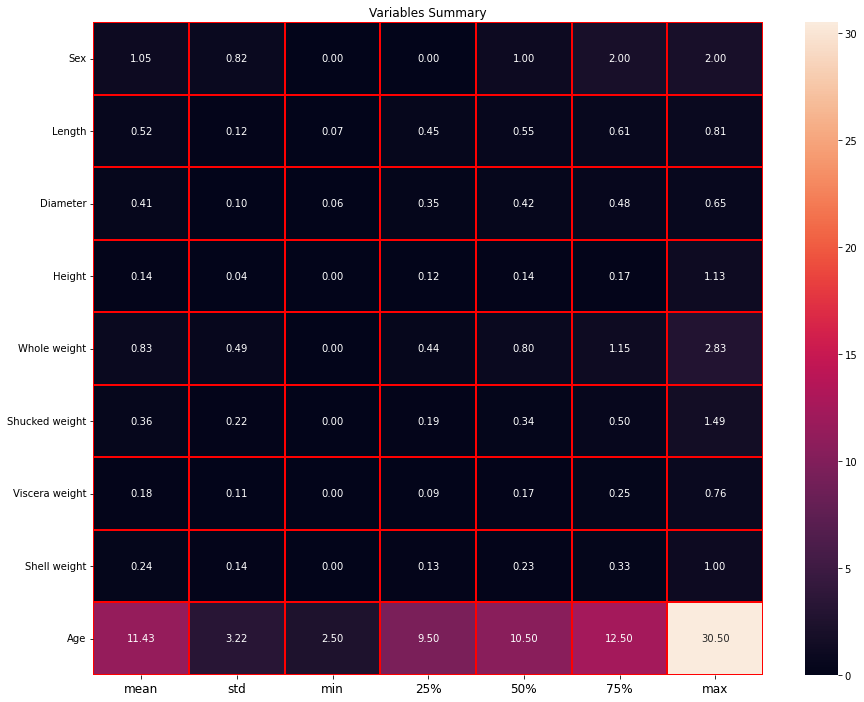

In [97]:
plt.figure(figsize=(15,12))
sns.heatmap(df.describe()[1:].transpose(),annot=True,linecolor='Red',linewidth=0.2,fmt='0.2f')
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.title('Variables Summary')
plt.savefig('heatmap.png')
plt.show()

#### Correlation

In [98]:
#will findout the correlation
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [100]:
#will findout correlation with respect to Target variable in ascending order
df.corr().Age.sort_values()

Sex              -0.034627
Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Age               1.000000
Name: Age, dtype: float64

Here we can see that attribute 'Sex' has negative correlation w.r.t. 'Age' but since it was categorical data hence will not drop this column from dataframe

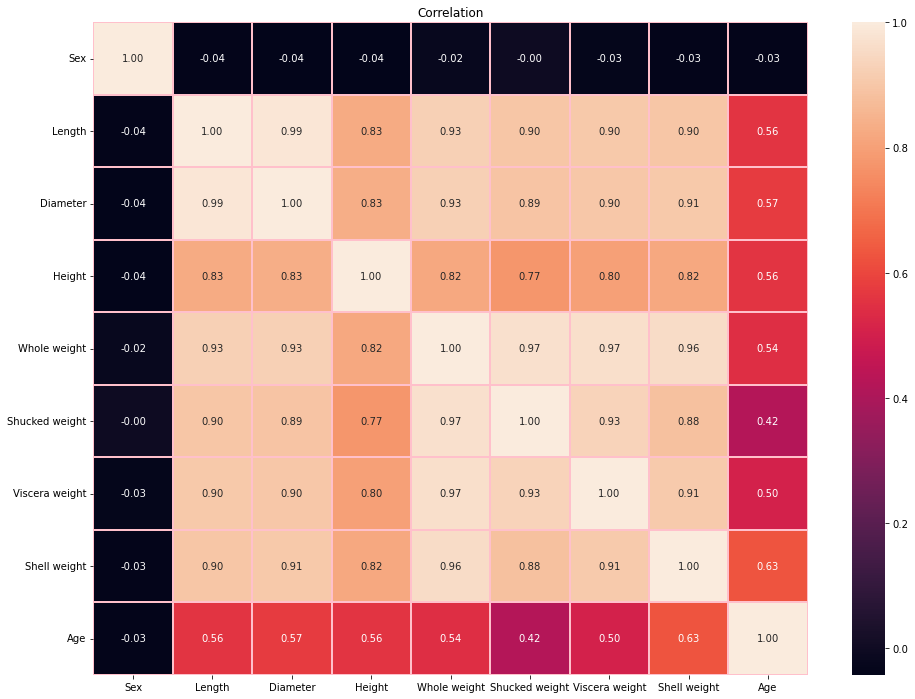

In [101]:
#Also,we can plot heatmap for the data visualization of correlation for the same
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,linecolor='Pink',linewidth=0.2,fmt='0.2f')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation')
plt.savefig('corr.png')
plt.show()

This shows that every attributes are having positive correlation with target variable except 'Sex' column and will not remove it.Also will go ahead and check multicollinearity if it's present in the dataset

#### Multicollinearity

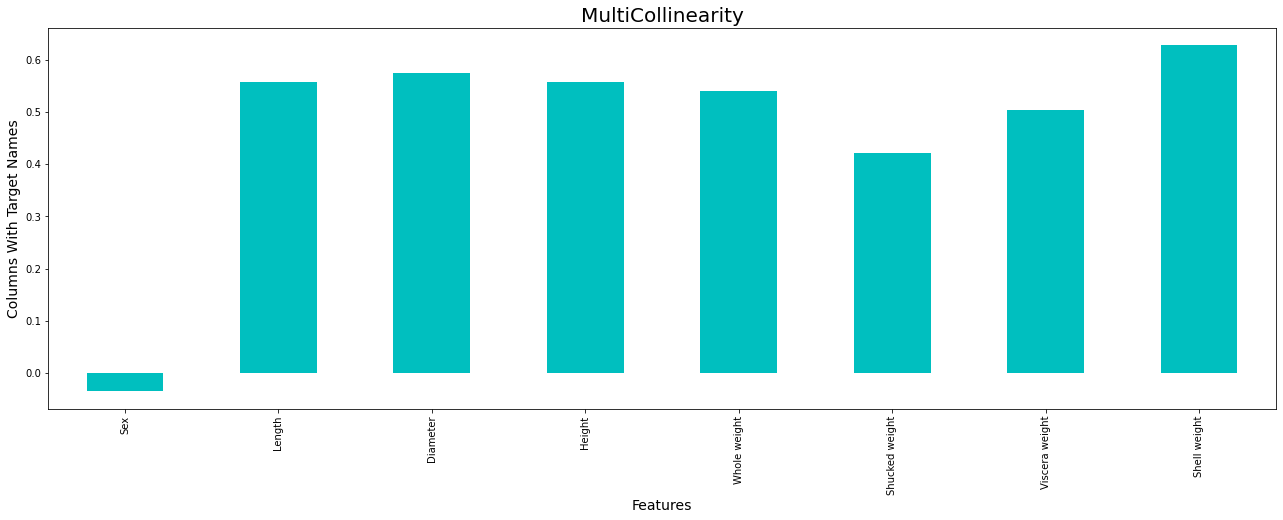

In [102]:
plt.figure(figsize=(22,7))
df.corr()['Age'].drop(['Age']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Columns With Target Names',fontsize=14)
plt.title('MultiCollinearity',fontsize=20)
plt.savefig('multicorr.png')
plt.show()

This shows that [Length and Diameter] & [Whole weight,Viscera weight and Shucked weight] & [shell weight and whole weight]columns are giving same amount of information to the target variable hence multicollinearity exist here.
Ergo will remove the columns,from each pair of above, which are less correlative.

#### Skewness

In [103]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Age               1.114102
dtype: float64

Will set the threshold value to (+/-0.6). As we can see here Length,Height,Shucked weight& Shell weight are skewed.

<AxesSubplot:xlabel='Length', ylabel='Density'>

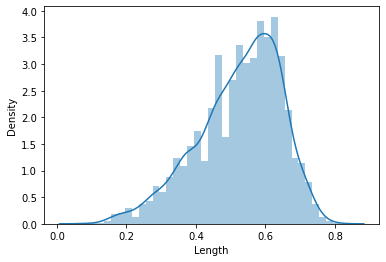

In [104]:
sns.distplot(df['Length'])

This shows that data is not normally distributed and have skewed in left hand side

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

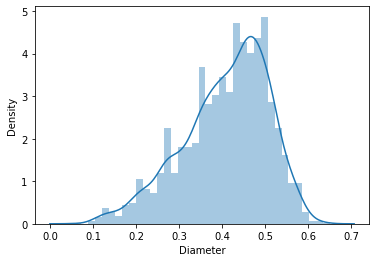

In [105]:
sns.distplot(df['Diameter'])

This shows that data is not normally distributed and have skewed in left hand side

<AxesSubplot:xlabel='Height', ylabel='Density'>

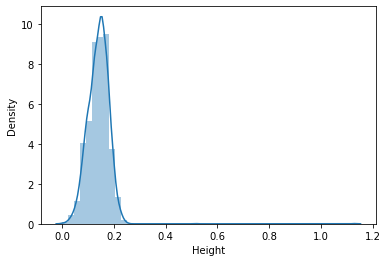

In [106]:
sns.distplot(df['Height'])

This shows that data is not normally distributed and have skewed in right hand side

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

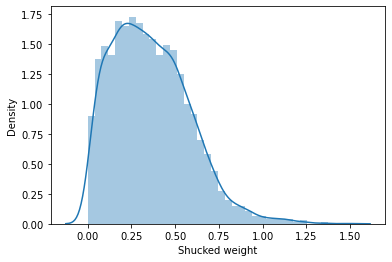

In [107]:
sns.distplot(df['Shucked weight'])

This shows that data is not normally distributed and have skewed in right hand side

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

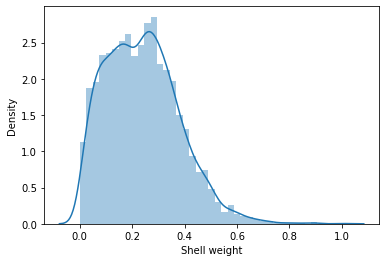

In [108]:
sns.distplot(df['Shell weight'])

This shows that data is not normally distributed and have skewed in right hand side

#### Outliers or Abnormal data

In [16]:
#will check Outlier or abnormal data
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

In [110]:
#at row 6th and column 8th there is outlier present
z.iloc[6,8]

3.12251641377204

At row 6th and column 8th there is outlier present having threshold value more than 3,which indicates an outlier

In [111]:
#This shows 6th column has a outlier present in any of its attributes
z.iloc[6]

Sex               1.280690
Length            0.050033
Diameter          0.071741
Height            0.250672
Whole weight      0.104505
Shucked weight    0.551363
Viscera weight    0.356690
Shell weight      0.655017
Age               3.122516
Name: 6, dtype: float64

#### Bivariate Data Visualization for Outliers(Boxplot)

<Figure size 1512x4536 with 0 Axes>

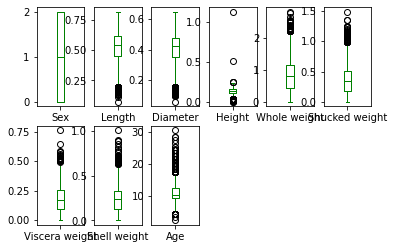

In [112]:
#we can boxplot to check the outliers availibility
plt.figure(figsize=(21,63))
df.plot(kind='box',subplots=True,layout=(2,6),color='green')
plt.show()

As we can see that Whole weight,Shucked weight,Viscera weight,Shell weight have more outliers presence than Length,Diameter & Height

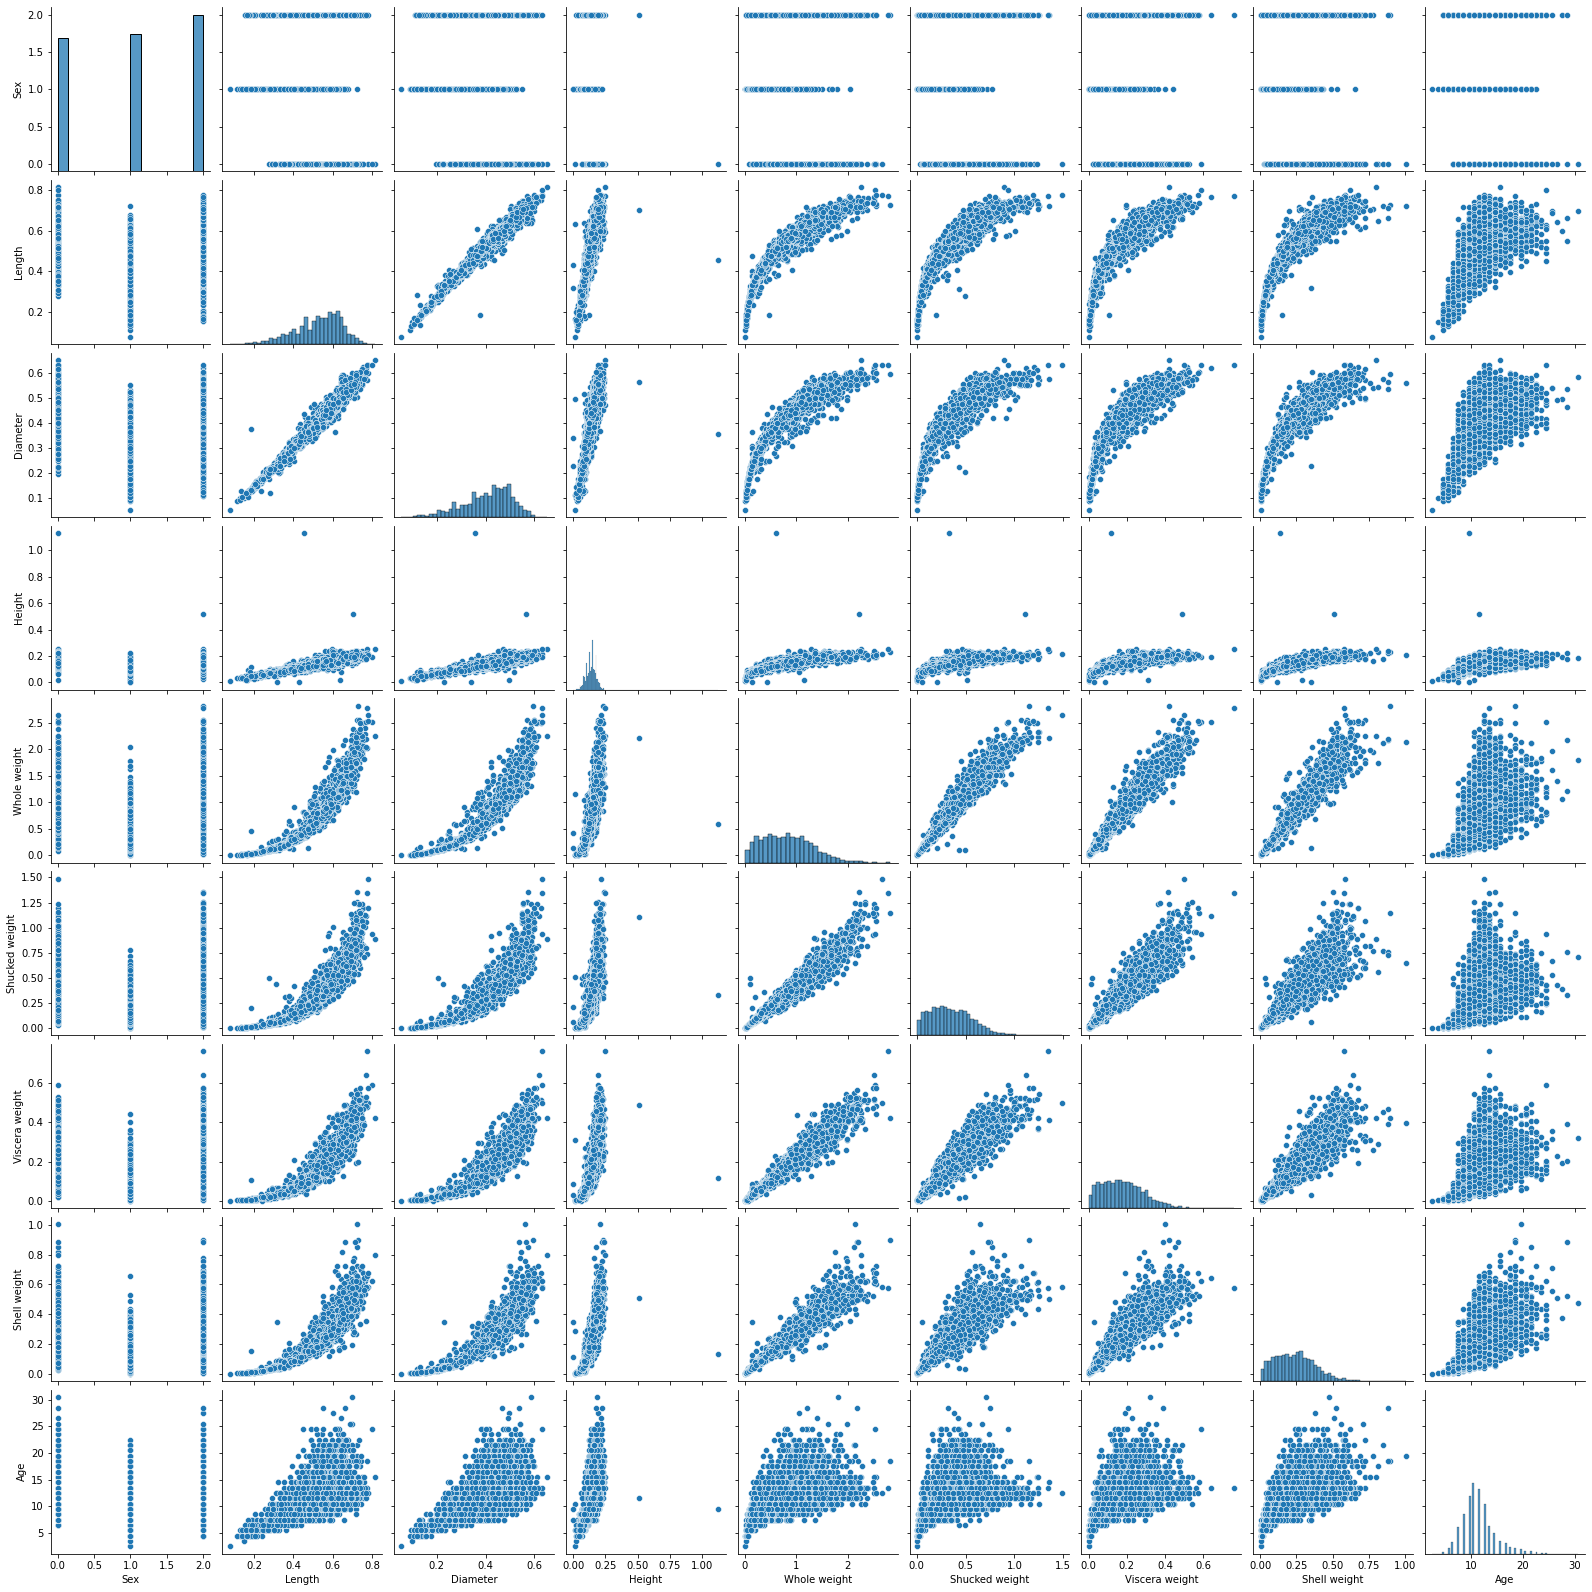

In [113]:
#Bi-variate analysis
sns.pairplot(df)

This will plot multiple graphs among all the variables itself and against all variables.
As we can see that there is positive correlation b/w length and diameter,shell weight and Whole weight & b/w Viscera weight and Shucked weight too.

#### Multicollinearity Removal

In [7]:
import scipy.stats
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
#now will seperate features and target variable
x=df.iloc[:,0:8]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [9]:
#Target variable
y=df.iloc[:,-1]
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

In [10]:
#will find out variance inflation factor to check the multicollinearity 
def vif_calc():
    df2=pd.DataFrame()
    df2['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]  
    df2['Features']=x.columns
    print(df2)

In [11]:
vif_calc()

   VIF Factor        Features
0    2.555356             Sex
1  700.488988          Length
2  749.121626        Diameter
3   42.128924          Height
4  421.652484    Whole weight
5  101.674946  Shucked weight
6   63.585627  Viscera weight
7   81.873737    Shell weight


###### Now will drop columns 'Length','Shucked weight',Height & 'Viscera weight' to remove multicollinearity 

In [55]:
#new dataset
df1=df.drop(['Length','Shucked weight','Height','Viscera weight' ],axis=1)
df1

,Sex,Diameter,Whole weight,Shell weight,Age
0,2,0.365,0.5140,0.1500,16.5
1,2,0.265,0.2255,0.0700,8.5
2,0,0.420,0.6770,0.2100,10.5
3,2,0.365,0.5160,0.1550,11.5
4,1,0.255,0.2050,0.0550,8.5
...,...,...,...,...,...
4172,0,0.450,0.8870,0.2490,12.5
4173,2,0.440,0.9660,0.2605,11.5
4174,2,0.475,1.1760,0.3080,10.5
4175,0,0.485,1.0945,0.2960,11.5


Now we have lost four columns in the process of multicollinearity

#### Outliers Removal

In [56]:
#Removal of outliers
df2=df1[(z<3).all(axis=1)]
df2

,Sex,Diameter,Whole weight,Shell weight,Age
0,2,0.365,0.5140,0.1500,16.5
1,2,0.265,0.2255,0.0700,8.5
2,0,0.420,0.6770,0.2100,10.5
3,2,0.365,0.5160,0.1550,11.5
4,1,0.255,0.2050,0.0550,8.5
...,...,...,...,...,...
4172,0,0.450,0.8870,0.2490,12.5
4173,2,0.440,0.9660,0.2605,11.5
4174,2,0.475,1.1760,0.3080,10.5
4175,0,0.485,1.0945,0.2960,11.5


As we can see that we have lost 150 rows in the process of outliers removal.

In [57]:
print(df1.shape)
print(df2.shape)

(4177, 5)
(4027, 5)


The new dataset are now having 4027 rows and 5 columns

In [58]:
loss_percentage=(4177-4027)/4177*100
loss_percentage

3.5910940866650707

The loss percentage is approax 4% which shows that we are going good and we have to remove the outliers and consider the new dataset as df1

#### Skewness Removal

In [18]:
#will remove skewness with the help of power transform method
from sklearn.preprocessing import power_transform

In [59]:
#first seperate features and target variables from the new dataframe that we have created i.e. df2
x=df2.iloc[:,:-1]
x

,Sex,Diameter,Whole weight,Shell weight
0,2,0.365,0.5140,0.1500
1,2,0.265,0.2255,0.0700
2,0,0.420,0.6770,0.2100
3,2,0.365,0.5160,0.1550
4,1,0.255,0.2050,0.0550
...,...,...,...,...
4172,0,0.450,0.8870,0.2490
4173,2,0.440,0.9660,0.2605
4174,2,0.475,1.1760,0.3080
4175,0,0.485,1.0945,0.2960


In [60]:
y=df2['Age']
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4027, dtype: float64

In [61]:
x=power_transform(x)
x

array([[ 1.13432919, -0.54337947, -0.57513463, -0.58635376],
       [ 1.13432919, -1.40113174, -1.35404959, -1.33271691],
       [-1.31306782,  0.03716259, -0.18449788, -0.08021413],
       ...,
       [ 1.13432919,  0.70592133,  0.85343427,  0.66363183],
       [-1.31306782,  0.8377131 ,  0.69738476,  0.57752029],
       [ 1.13432919,  1.85550496,  2.14577532,  1.85675543]])

In [62]:
#will use standardscaler technique to make the dataset normally distributed
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.13432919, -0.54337947, -0.57513463, -0.58635376],
       [ 1.13432919, -1.40113174, -1.35404959, -1.33271691],
       [-1.31306782,  0.03716259, -0.18449788, -0.08021413],
       ...,
       [ 1.13432919,  0.70592133,  0.85343427,  0.66363183],
       [-1.31306782,  0.8377131 ,  0.69738476,  0.57752029],
       [ 1.13432919,  1.85550496,  2.14577532,  1.85675543]])

In [63]:
x.mean()

1.5880021410084185e-17

Mean is approx zero

In [26]:
x.std()

1.0

Standard deviation is also (+/-1)
hence we can say that we have acheived the optimal condition where the mean is zero and standard deviation is +/-1 and dataset is normally distributed

<AxesSubplot:ylabel='Density'>

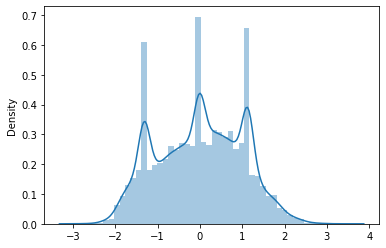

In [27]:
sns.distplot(x)

when we are taking the distribution plot of features then all the dataset are normally distributed where the mean is 0 and std is +/-1,also the dataset are in the range b/w -3 to +3.

#### Training & Testing Phase of Machine Learning

In [64]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [65]:
#features
x

array([[ 1.13432919, -0.54337947, -0.57513463, -0.58635376],
       [ 1.13432919, -1.40113174, -1.35404959, -1.33271691],
       [-1.31306782,  0.03716259, -0.18449788, -0.08021413],
       ...,
       [ 1.13432919,  0.70592133,  0.85343427,  0.66363183],
       [-1.31306782,  0.8377131 ,  0.69738476,  0.57752029],
       [ 1.13432919,  1.85550496,  2.14577532,  1.85675543]])

In [66]:
#target variable
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4027, dtype: float64

###### I'm taking here Linear Regression model first to train and test the model

In [67]:
lr=LinearRegression()

In [68]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print(f'At Random State {i} the Training Accuracy is: {r2_score(y_train,pred_train)}')
    print(f' At Random State {i} the Testing Accuracy is: {r2_score(y_test,pred_test)}')
    print('\n')

At Random State 0 the Training Accuracy is: 0.45315910590990394
 At Random State 0 the Testing Accuracy is: 0.41635352095588407


At Random State 1 the Training Accuracy is: 0.4473920223327744
 At Random State 1 the Testing Accuracy is: 0.425396148081879


At Random State 2 the Training Accuracy is: 0.4458813826434602
 At Random State 2 the Testing Accuracy is: 0.4342499295551975


At Random State 3 the Training Accuracy is: 0.4453732440620498
 At Random State 3 the Testing Accuracy is: 0.4348036772767193


At Random State 4 the Training Accuracy is: 0.4404468226624847
 At Random State 4 the Testing Accuracy is: 0.44621183006812115


At Random State 5 the Training Accuracy is: 0.4613145980014478
 At Random State 5 the Testing Accuracy is: 0.39657522429113357


At Random State 6 the Training Accuracy is: 0.4395120953631181
 At Random State 6 the Testing Accuracy is: 0.44780167823859207


At Random State 7 the Training Accuracy is: 0.4631138668603326
 At Random State 7 the Testing Accura

At random_state 60 the testing score is 49% and training score is almost 42% this shows that there are biasness and variance present in the dataset

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=60)
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
pred_train=lr.predict(x_train)
print('At random_state 60')
print('The Training Accuracy is:',r2_score(y_train,pred_train))
print('The Testing Accuracy is:',r2_score(y_test,pred_test))
print('\n')

At random_state 60
The Training Accuracy is: 0.42290913440466926
The Testing Accuracy is: 0.48641543688469746




We have got the training and testing accuracy of this linear model as 42% & 49% respectively

#### Linear Regression Best-Fit Line

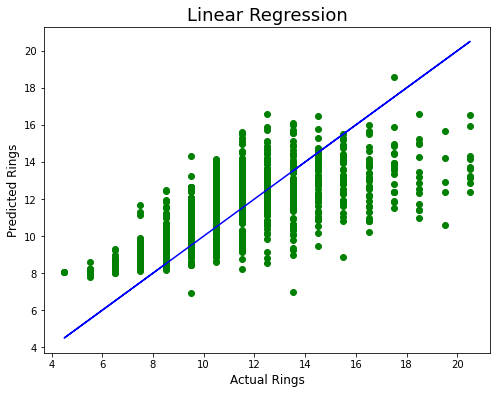

In [71]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred_test,color='green')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Rings',fontsize=12)
plt.ylabel('Predicted Rings',fontsize=12)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

This shows that baisness and variance is there & thats why we are getting low testing and training accuracy. Also this best fit line is not containing more points onto it.

#### Regularization Method & Hyper Parameter Tunning

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
#cross_val_score=cross_val_score(estimator=,x,y,cv=)
for j in range(2,10):
    cvs=cross_val_score(lr,x,y,cv=j)
    mean=cvs.mean()
    stnd=cvs.std()
    print(f'At K-Fold {j} the CV Score is {mean},\n accuracy for training is {r2_score(y_train,pred_train)} and\n accuracy for testing is {r2_score(y_test,pred_test)}')
    print('\n')

At K-Fold 2 the CV Score is 0.4502419080301262,
 accuracy for training is 0.43587662876099487 and
 accuracy for testing is 0.49161652929899124


At K-Fold 3 the CV Score is 0.43359040830507184,
 accuracy for training is 0.43587662876099487 and
 accuracy for testing is 0.49161652929899124


At K-Fold 4 the CV Score is 0.35048255553155094,
 accuracy for training is 0.43587662876099487 and
 accuracy for testing is 0.49161652929899124


At K-Fold 5 the CV Score is 0.35108199097673254,
 accuracy for training is 0.43587662876099487 and
 accuracy for testing is 0.49161652929899124


At K-Fold 6 the CV Score is 0.35625259699753736,
 accuracy for training is 0.43587662876099487 and
 accuracy for testing is 0.49161652929899124


At K-Fold 7 the CV Score is 0.3648234399509182,
 accuracy for training is 0.43587662876099487 and
 accuracy for testing is 0.49161652929899124


At K-Fold 8 the CV Score is 0.32997243143244337,
 accuracy for training is 0.43587662876099487 and
 accuracy for testing is 0.

At K-Fold 2 we are getting CV score and accuracy of testing better as compare to others. Hence will consider CV=2 while processing further for prediction

In [43]:
cvs=cross_val_score(lr,x,y,cv=2)
mean=cvs.mean()
stnd=cvs.std()
print(f'At K-Fold {2} the CV Score is {mean},\n accuracy for training is {r2_score(y_train,pred_train)} and\n accuracy for testing is {r2_score(y_test,pred_test)}')
print('\n')

At K-Fold 2 the CV Score is 0.4502419080301262,
 accuracy for training is 0.43587662876099487 and
 accuracy for testing is 0.49161652929899124




In [45]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV
ls=Lasso()
rd=Ridge()
el=ElasticNet()

In [46]:
#gd=GridSearchCV(estimator=,param_grid=,CV=)
dictn={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
gd=GridSearchCV(estimator=ls,param_grid=dictn,cv=2)
gd.fit(x_train,y_train)
print(gd.best_params_)
print(gd.best_score_)

{'alpha': 0.001, 'random_state': 0}
0.43056127243403763


In [47]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls_training_score=ls.score(x_train,y_train)
ls_predict=ls.predict(x_test)
print('lasso training score',ls_training_score)
print('lasso testing score',r2_score(y_test,ls_predict))

lasso training score 0.43585724639798695
lasso testing score 0.4915487910522829


In [48]:
#gd=GridSearchCV(estimator=,param_grid=,CV=)
dictn={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
gd=GridSearchCV(estimator=rd,param_grid=dictn,cv=2)
gd.fit(x_train,y_train)
print(gd.best_params_)
print(gd.best_score_)

{'alpha': 0.1, 'random_state': 0}
0.4304779847445585


In [49]:
rd=Ridge(alpha=0.1,random_state=0)
rd.fit(x_train,y_train)
rd_training_score=rd.score(x_train,y_train)
rd_predict=rd.predict(x_test)
print('Ridge training score',rd_training_score)
print('Ridge testing score',r2_score(y_test,rd_predict))

Ridge training score 0.43587652290871437
Ridge testing score 0.491605333937457


In [50]:
#gd=GridSearchCV(estimator=,param_grid=,CV=)
dictn={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
gd=GridSearchCV(estimator=el,param_grid=dictn,cv=2)
gd.fit(x_train,y_train)
print(gd.best_params_)
print(gd.best_score_)

{'alpha': 0.001, 'random_state': 0}
0.4305163245890549


In [51]:
el=ElasticNet(alpha=0.001,random_state=0)
el.fit(x_train,y_train)
el_training_score=el.score(x_train,y_train)
el_predict=el.predict(x_test)
print('ElasticNet training score',el_training_score)
print('ElasticNet testing score',r2_score(y_test,el_predict))

ElasticNet training score 0.43583488955373295
ElasticNet testing score 0.4914025480654898


In [74]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [72]:
rf=RandomForestRegressor()
dictnr={'criterion':['mae','mse'],'max_features':["sqrt", "log2", 'auto']}
gds=GridSearchCV(rf,dictnr)
gds.fit(x_train,y_train)
print(gds.best_params_)
print(gds.best_score_)

{'criterion': 'mae', 'max_features': 'sqrt'}
0.45937643691756513


In [176]:
rf=RandomForestRegressor(criterion='mae',max_features='sqrt')
rf.fit(x_train,y_train)
rf_train_score=rf.score(x_train,y_train)
rf_pred=rf.predict(x_test)
print('RandomForestRegressor training score',rf_train_score)
print('RandomForestRegressor testing score',r2_score(y_test,rf_pred))

RandomForestRegressor training score 0.9126173922981846
RandomForestRegressor testing score 0.5087424760355281


In [77]:
ab=AdaBoostRegressor()
dictn={'loss' :['linear', 'square', 'exponential']}
gds=GridSearchCV(ab,dictn)
gds.fit(x_train,y_train)
print(gds.best_params_)
print(gds.best_score_)

{'loss': 'linear'}
0.3397980248673487


In [80]:
ab=AdaBoostRegressor(loss='linear')
ab.fit(x_train,y_train)
ab_train_score=ab.score(x_train,y_train)
ab_pred=ab.predict(x_test)
print('AdaBoostRegressor training score',ab_train_score)
print('AdaBoostRegressor testing score',r2_score(y_test,ab_pred))

AdaBoostRegressor training score 0.36169689131385474
AdaBoostRegressor testing score 0.3471136201329782


In [81]:
grd=GradientBoostingRegressor()
dictn={'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],'criterion': ['friedman_mse', 'squared_error', 'mse']}
gds=GridSearchCV(grd,dictn)
gds.fit(x_train,y_train)
print(gds.best_params_)
print(gds.best_score_)

{'criterion': 'mse', 'loss': 'squared_error'}
0.47217276573456557


In [82]:
grd=GradientBoostingRegressor(criterion= 'mse',loss= 'squared_error')
grd.fit(x_train,y_train)
grd_train_score=grd.score(x_train,y_train)
grd_pred=grd.predict(x_test)
print('Gradient Boosting Regressor training score',grd_train_score)
print('Gradient Boosting Regressor testing score',r2_score(y_test,grd_pred))

Gradient Boosting Regressor training score 0.5619816107597722
Gradient Boosting Regressor testing score 0.5151127809377758


We are getting model testing & training accuracy almost same and cross validation accuracy score is 45%.

##### Saving the best model

In [83]:
import pickle
filename='abalone.pkl'
pickle.dump(grd,open(filename,'wb'))

##### Loading this model for making prediction

In [84]:
loaded_model=pickle.load(open('abalone.pkl','rb'))
result=loaded_model.score(x_test,y_test)
result*100

51.51127809377758

#### Conclusion

In [85]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],grd_pred[:]],index=['Predicted','Orginial'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208
Predicted,9.583503,9.15826,7.202279,11.847796,8.635072,10.883075,13.807763,13.424879,8.336997,11.507179,...,12.449715,11.644687,12.22163,10.940741,12.15598,9.443925,12.157564,12.948899,16.12504,11.392419
Orginial,9.583503,9.15826,7.202279,11.847796,8.635072,10.883075,13.807763,13.424879,8.336997,11.507179,...,12.449715,11.644687,12.22163,10.940741,12.15598,9.443925,12.157564,12.948899,16.12504,11.392419


###### From above all the models we can conclude that GradientBoostingRegressor is best in predicting the age of abalone as we are getting training and testing accuracy is almost equal. We can say that model was not that strong as only 51% of accuracy is there while testing but still we've got the optimal condition of the Regularization where there is low bias and low variance.